# Indexing Landsat data available on AWS into datacube

### Before Indexing AWS landsat data
    You will need an AWS account and a .aws/credentials file:

    [default]
    aws_access_key_id = <Access key ID>
    aws_secret_access_key = <Secret access key>


In [1]:
!datacube --help

Usage: datacube [OPTIONS] COMMAND [ARGS]...

  Data Cube command-line interface

Options:
  --version
  -v, --verbose           Use multiple times for more verbosity
  --log-file TEXT         Specify log file
  -C, --config_file TEXT
  --log-queries           Print database queries.
  -h, --help              Show this message and exit.

Commands:
  dataset        Dataset management commands
  ingest         Ingest datasets
  metadata_type  Metadata type commands
  product        Product commands
  system         System commands
  user           User management commands


In [2]:
!datacube --version

Open Data Cube core, version 1.5.4


## Sample product definition for LANDSAT_8 Collection1 level 1 data

    name: ls8_level1
    description: Landsat 8 Level 1 Collection-1 OLI-TIRS
    metadata_type: eo

    metadata:
        platform:
            code: LANDSAT_8
        instrument:
            name: OLI_TIRS
        product_type: Level1
        format:
            name: GeoTiff

    measurements:
        - name: 'blue'
          aliases: [band_2, blue]
          dtype: int16
          nodata: -9999
          units: '1'

        - name: 'green'
          aliases: [band_3, green]
          dtype: int16
          nodata: -9999
          units: '1'

        - name: 'red'
          aliases: [band_4, red]
          dtype: int16
          nodata: -9999
          units: '1'

        - name: 'nir'
          aliases: [band_5, nir]
          dtype: int16
          nodata: -9999
          units: '1'


The product definition can be obtained [here](https://github.com/opendatacube/datacube-core/tree/develop/docs/config_samples/dataset_types)

## Adding product definition to datacube

In [4]:
!datacube product add ls_sample_product.yaml

Added "ls8_level1"


## Viewing added products 

In [11]:
!datacube product list

   name                 description                                        product_type instrument format    platform    
id                                                                                                                       
1            ls8_level1            Landsat 8 Level 1 Collection-1 OLI-TIRS    Level1     OLI_TIRS    GeoTiff    LANDSAT_8
2       s2a_ard_granule  Sentinel-2A MSI ARD - NBAR NBART and Pixel Qua...  S2MSIARD          MSI    GeoTIFF  Sentinel-2A
4   s2a_level1c_granule  Sentinel-2A Level1C - Ortho Rectified Top of A...   S2MSI1C          MSI   JPEG2000  Sentinel-2A
6   s2a_sen2cor_granule  Sentinel-2 Level 2 - Sen2Cor Bottom of Atmosph...  S2MSI2Ap          MSI   JPEG2000  SENTINEL_2A
3       s2b_ard_granule  Sentinel-2B MSI ARD - NBAR NBART and Pixel Qua...  S2MSIARD          MSI    GeoTIFF  Sentinel-2B
5   s2b_level1c_granule  Sentinel-2B Level1C - Ortho Rectified Top of A...   S2MSI1C          MSI   JPEG2000  Sentinel-2B



# Landsat on AWS

- Landsat 8 data is available for anyone to use via Amazon S3. All Landsat 8 scenes are available from the start of imagery capture. All new Landsat 8 scenes are made available each day, often within hours of production.

- AWS has made Landsat 8 data freely available on Amazon S3 so that anyone can use our on-demand computing resources to perform analysis and create new products without needing to worry about the cost of storing Landsat data or the time required to download it.

- All Landsat 8 scenes are available from the start of imagery capture. All new Landsat 8 scenes are made available each day, often within hours of production.

- Landsat on AWS makes each band of each Landsat scene available as a stand-alone GeoTIFF and the scene’s metadata is hosted as a text file.

### About the Data
         Source                                                       U.S. Geological Survey
         Category                                        GIS, Sensor Data, Satellite Imagery, Natural Resource
         Format 	                                                  GeoTIFF, txt, jpg
         Storage Service 	                                           Amazon S3
         Location 	                                       s3://landsat-pds in US West (Oregon) Region
         Update Frequency 	                      New Landsat 8 scenes are added regularly as soon as they are available

# Indexing 'landsat-pds' public bucket data 

In [1]:
!python ls_public_bucket.py --help

Usage: ls_public_bucket.py [OPTIONS] BUCKET_NAME

  Enter Bucket name. Optional to enter configuration file to access a
  different database

Options:
  -c, --config PATH  Pass the configuration file to access the database
  -p TEXT            Pass the prefix of the object to the bucket
  --help             Show this message and exit.


#### Indicate which bucket to access and index. The prepare script is available in opendatacube github repo. [Link](https://github.com/opendatacube/datacube-core/tree/develop/utils)
#### Since 'landsat-pds' bucket is spread across the Globe,
#### there is an option for prefix to index path and row  
#### For Example:

Collection 1 Data

The data are organized using a directory structure based on each scene’s path and row. For instance, the files for Landsat scene LC08_L1TP_139045_20170304_20170316_01_T1 are available in the following location: s3://landsat-pds/c1/L8/139/045/LC08_L1TP_139045_20170304_20170316_01_T1/

The “c1” refers to Collection 1, the “L8” refers to Landsat 8, “139” refers to the scene’s path, “045” refers to the scene’s row, and the final directory matches the product’s identifier, which uses the following naming convention: LXSS_LLLL_PPPRRR_YYYYMMDD_yyymmdd_CC_TX, in which:

    L = Landsat
    X = Sensor
    SS = Satellite
    PPP = WRS path
    RRR = WRS row
    YYYYMMDD = Acquisition date
    yyyymmdd = Processing date
    CC = Collection number
    TX = Collection category
### So the prefix here can be c1/L8/033/042

In [7]:
!time python ls_public_bucket.py landsat-pds -p c1/L8/033/042/

2018-02-15 11:47:15,375 INFO Found credentials in shared credentials file: ~/.aws/credentials
2018-02-15 11:47:15,408 INFO Bucket : landsat-pds
2018-02-15 11:47:15,411 INFO Calling paginated s3:list_objects with {'Bucket': 'landsat-pds', 'Prefix': 'c1/L8/033/042/'}
2018-02-15 11:47:15,415 INFO Starting new HTTPS connection (1): landsat-pds.s3.amazonaws.com
2018-02-15 11:47:19,177 INFO Processing c1/L8/033/042/LC08_L1TP_033042_20170313_20170328_01_T1/LC08_L1TP_033042_20170313_20170328_01_T1_MTL.txt
2018-02-15 11:47:19,177 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'c1/L8/033/042/LC08_L1TP_033042_20170313_20170328_01_T1/LC08_L1TP_033042_20170313_20170328_01_T1_MTL.txt'}
2018-02-15 11:47:19,384 INFO Indexing 62a89ab0-df57-57fb-92c8-3554b6c76861
2018-02-15 11:47:19,393 INFO Indexing c1/L8/033/042/LC08_L1TP_033042_20170313_20170328_01_T1/LC08_L1TP_033042_20170313_20170328_01_T1_MTL.txt
2018-02-15 11:47:19,393 INFO Processing c1/L8/033/042/LC08_L1TP_033042_20170329_2017

2018-02-15 11:47:22,905 INFO Indexing 4610ff32-ee21-5bae-86d7-567847d7c367
2018-02-15 11:47:22,910 INFO Indexing c1/L8/033/042/LC08_L1TP_033042_20170804_20170805_01_RT/LC08_L1TP_033042_20170804_20170805_01_RT_MTL.txt
2018-02-15 11:47:22,910 INFO Processing c1/L8/033/042/LC08_L1TP_033042_20170804_20170812_01_T1/LC08_L1TP_033042_20170804_20170812_01_T1_MTL.txt
2018-02-15 11:47:22,910 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'c1/L8/033/042/LC08_L1TP_033042_20170804_20170812_01_T1/LC08_L1TP_033042_20170804_20170812_01_T1_MTL.txt'}
2018-02-15 11:47:23,208 INFO Indexing 1e5a903d-cb6f-53c1-8e78-79a857aeaa3d
2018-02-15 11:47:23,213 INFO Indexing c1/L8/033/042/LC08_L1TP_033042_20170804_20170812_01_T1/LC08_L1TP_033042_20170804_20170812_01_T1_MTL.txt
2018-02-15 11:47:23,213 INFO Processing c1/L8/033/042/LC08_L1TP_033042_20170820_20170821_01_RT/LC08_L1TP_033042_20170820_20170821_01_RT_MTL.txt
2018-02-15 11:47:23,213 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 

2018-02-15 11:47:28,646 INFO Indexing 9f2b93c8-1db9-50c7-8b48-5551911d9898
2018-02-15 11:47:28,651 INFO Indexing c1/L8/033/042/LC08_L1TP_033042_20171124_20171206_01_T1/LC08_L1TP_033042_20171124_20171206_01_T1_MTL.txt
2018-02-15 11:47:28,651 INFO Processing c1/L8/033/042/LC08_L1TP_033042_20171210_20171210_01_RT/LC08_L1TP_033042_20171210_20171210_01_RT_MTL.txt
2018-02-15 11:47:28,651 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'c1/L8/033/042/LC08_L1TP_033042_20171210_20171210_01_RT/LC08_L1TP_033042_20171210_20171210_01_RT_MTL.txt'}
2018-02-15 11:47:28,914 INFO Indexing af51a8ab-9f31-59a7-b6b6-adaaa7dbd149
2018-02-15 11:47:28,918 INFO Indexing c1/L8/033/042/LC08_L1TP_033042_20171210_20171210_01_RT/LC08_L1TP_033042_20171210_20171210_01_RT_MTL.txt
2018-02-15 11:47:28,919 INFO Processing c1/L8/033/042/LC08_L1TP_033042_20171210_20171223_01_T1/LC08_L1TP_033042_20171210_20171223_01_T1_MTL.txt
2018-02-15 11:47:28,919 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 

## Indexing complete for Collection 1 path 033 and row 042 
## Time to index 39 datasets = ~17 seconds

## Check datasets indexed :

In [8]:
!datacube dataset --help

Usage: datacube dataset [OPTIONS] COMMAND [ARGS]...

  Dataset management commands

Options:
  -h, --help  Show this message and exit.

Commands:
  add      Add datasets to the Data Cube
  archive  Archive datasets
  info     Display dataset information
  restore  Restore datasets
  search   Search available Datasets  Search...
  update   Update datasets in the Data Cube


In [ ]:
!datacube dataset search product ='ls8_level1'

### The above cell lists the datasets available for product 'ls8_level1'

In [10]:
!datacube dataset search product ='ls8_level1' |grep id |wc

     39      78    1599


### There are 39 datasets available for LANDSAT 8 Collection 1 for path 033 and row 042 

### Pre Collection Data 

- The data are organized using a directory structure based on each scene’s path and row. For instance, the files for Landsat scene LC81390452014295LGN00 are available in the following location: s3://landsat-pds/L8/139/045/LC81390452014295LGN00/

- The “L8” directory refers to Landsat 8, “139” refers to the scene’s path, “045” refers to the scene’s row, and the final directory matches the scene’s identifier, which uses the following naming convention: LXSPPPRRRYYYYDDDGSIVV, in which:

       L = Landsat
       X = Sensor
       S = Satellite
       PPP = WRS path
       RRR = WRS row
       YYYY = Year
       DDD = Julian day of year
       GSI = Ground station identifier
       VV = Archive version number


### Indexing Precollection data for same path and row 

In [ ]:
!time python ls_public_bucket.py landsat-pds -p L8/033/042/

## Time taken to index pre collection level1 = 38 seconds

In [12]:
!datacube dataset search product ='ls8_level1' |grep id |wc

    130     260    5330


## 91 datasets available for precollection path 033 and row 042

## Indexing path =046 and row = 028

In [ ]:
!time python ls_public_bucket.py landsat-pds -p L8/046/028/

In [ ]:
!datacube dataset search product ='ls8_level1' 

### Sample dataset 

    id: 62a89ab0-df57-57fb-92c8-3554b6c76861
    product: ls8_level1
    status: active
    locations:
    - http://landsat-pds.s3.amazonaws.com/c1/L8/033/042/LC08_L1TP_033042_20170313_20170328_01_T1/LC08_L1TP_033042_20170313_20170328_01_T1_MTL.txt
    fields:
    instrument: OLI_TIRS
    lat: {begin: 24.923891317485154, end: 27.044837184680176}
    lon: {begin: -109.35854521931238, end: -107.05790554900032}
    platform: LANDSAT_8
    product_type: Level1
    time: {begin: '2017-03-13T17:41:01.252643+00:00', end: '2017-03-13T17:41:01.252643+00:00'}

In [14]:
!datacube dataset search product ='ls8_level1' |grep id |wc

    222     444    9102


## Landsat 8 Band Reference 

    Operational Land Imager (OLI)and Thermal Infrared Sensor (TIRS)

 
	Bands 	                                  Wavelength      Resolution
                                             (micrometers) 	  (meters)
                                                            
    Band 1 - Ultra Blue (coastal/aerosol) 	  0.435 - 0.451 	30
    Band 2 - Blue 	                          0.452 - 0.512 	30
    Band 3 - Green 	                          0.533 - 0.590 	30
    Band 4 - Red 	                          0.636 - 0.673 	30
    Band 5 - Near Infrared (NIR) 	          0.851 - 0.879 	30
    Band 6 - Shortwave Infrared (SWIR) 1 	  1.566 - 1.651 	30
    Band 7 - Shortwave Infrared (SWIR) 2 	  2.107 - 2.294 	30
    Band 8 - Panchromatic 	                  0.503 - 0.676 	15
    Band 9 - Cirrus 	                      1.363 - 1.384 	30
    Band 10 - Thermal Infrared (TIRS) 1 	  10.60 - 11.19 	100 * (30)
    Band 11 - Thermal Infrared (TIRS) 2 	  11.50 - 12.51 	100 * (30)

In [2]:
import datacube 
from rasterio.plot import show_hist

In [3]:
from datetime import datetime

In [4]:
dc= datacube.Datacube()


In [5]:
date_range = (
        datetime(2017,3,12),
        datetime(2017,3,14))

In [6]:
ds = dc.load(product='ls8_level1',x = (-108.0,-109), y =(25.10,26.10),output_crs = 'epsg:32610', resolution = (-30,30),time = date_range, measurements = ('red', 'green', 'blue','nir') )

In [7]:
ds.all

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:  (time: 1, x: 3837, y: 4149)
Coordinates:
  * time     (time) datetime64[ns] 2017-03-13T17:41:01.252643
  * y        (y) float64 2.975e+06 2.975e+06 2.975e+06 2.975e+06 2.975e+06 ...
  * x        (x) float64 1.909e+06 1.909e+06 1.909e+06 1.909e+06 1.909e+06 ...
Data variables:
    red      (time, y, x) int16 6933 6773 6771 6769 6767 6752 6760 6786 6822 ...
    green    (time, y, x) int16 7944 7852 7825 7849 7849 7840 7849 7871 7901 ...
    blue     (time, y, x) int16 8672 8643 8646 8647 8644 8645 8635 8632 8666 ...
    nir      (time, y, x) int16 20191 20824 21024 20987 20996 21177 21255 ...
Attributes:
    crs:      epsg:32610>

In [8]:
%pylab notebook
from datacube.storage import masking
from datacube import Datacube
from datetime import datetime
from skimage import exposure

Populating the interactive namespace from numpy and matplotlib


/home/ubuntu/miniconda/envs/harshuenv/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [9]:
def threeBandImage(ds, bands, time = 0, figsize = [10,10], projection = 'projected'):
    '''
    threeBandImage takes three spectral bands and plots them on the RGB bands of an image. 
    
    Inputs: 
    ds -   Dataset containing the bands to be plotted
    bands - list of three bands to be plotted
    
    Optional:
    time - Index value of the time dimension of ds to be plotted
    figsize - dimensions for the output figure
    projection - options are 'projected' or 'geographic'. To determine if the image is in degrees or northings
    '''
    t, y, x = ds[bands[0]].shape
    rawimg = np.zeros((y,x,3), dtype = np.float32)
    for i, colour in enumerate(bands):
        rawimg[:,:,i] = ds[colour][time].values
    rawimg[rawimg == -9999] = np.nan
    img_toshow = exposure.equalize_hist(rawimg, mask = np.isfinite(rawimg))
    fig = plt.figure(figsize = figsize)
    imshow(img_toshow)
    ax = plt.gca()
    ax.set_title(str(ds.time[time].values), fontweight = 'bold', fontsize = 16)
    ax.set_xticklabels(ds.x.values)
    ax.set_yticklabels(ds.y.values)
    ax.set_xlabel('Longitude', fontweight = 'bold')
    ax.set_ylabel('Latitude', fontweight = 'bold')


<IPython.core.display.Javascript object>


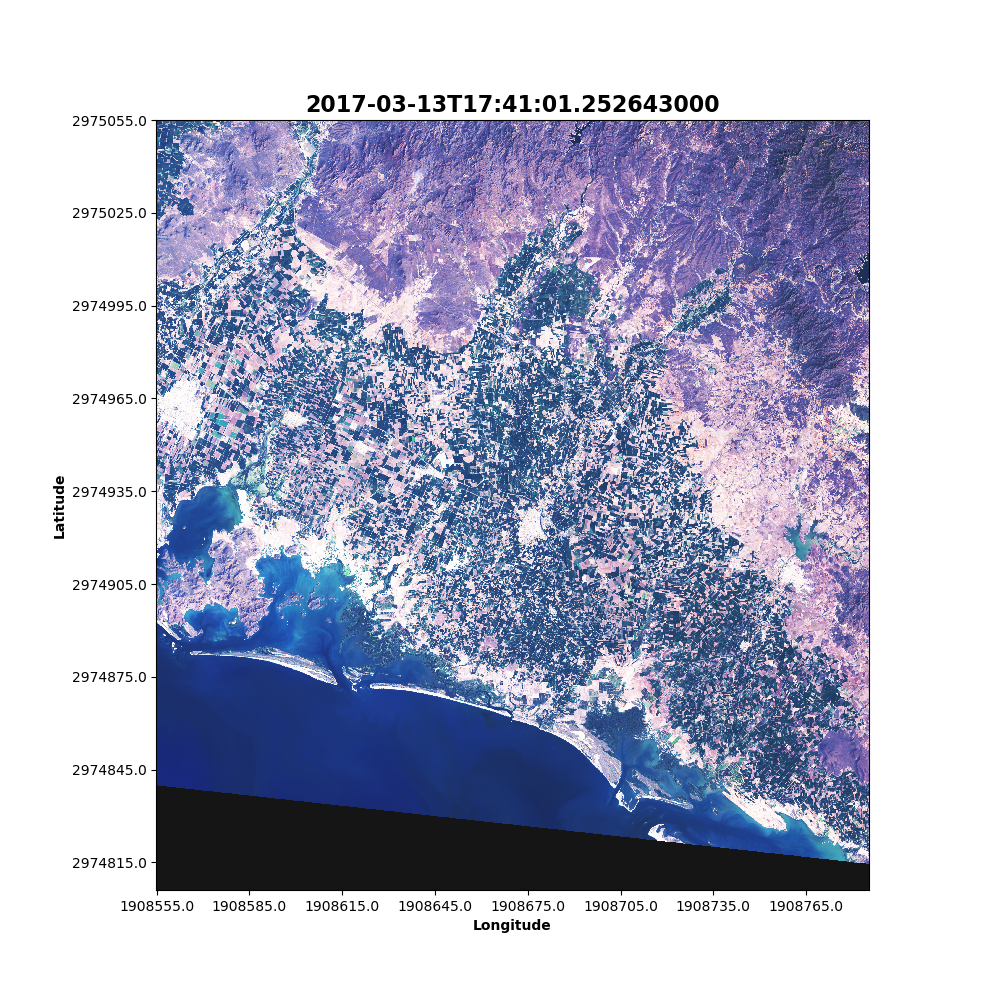

In [10]:
threeBandImage(ds,bands = ['red', 'green', 'blue'])

In [5]:
date_range = (
        datetime(2017,4,8),
        datetime(2017,4,28))

In [13]:
ds = dc.load(product='ls8_level1',x = (-121.0,-122.905), y =(45.10,46.60),output_crs = 'epsg:32610', resolution = (-30,30),time = date_range, measurements = ('red', 'green', 'blue','nir') )

In [14]:
ds.chunk

<bound method Dataset.chunk of <xarray.Dataset>
Dimensions:  (time: 2, x: 5003, y: 5621)
Coordinates:
  * time     (time) datetime64[ns] 2017-04-09T18:55:33.548689 ...
  * y        (y) float64 5.163e+06 5.163e+06 5.163e+06 5.163e+06 5.163e+06 ...
  * x        (x) float64 5.073e+05 5.073e+05 5.073e+05 5.074e+05 5.074e+05 ...
Data variables:
    red      (time, y, x) int16 10917 11057 11015 10929 10921 10897 10946 ...
    green    (time, y, x) int16 11376 11480 11459 11403 11374 11382 11428 ...
    blue     (time, y, x) int16 12617 12687 12690 12605 12572 12575 12623 ...
    nir      (time, y, x) int16 14730 14365 15115 15755 15694 15764 15914 ...
Attributes:
    crs:      epsg:32610>

In [9]:
from datacube.storage.masking import mask_invalid_data
def plot_rgb(image, fake_saturation):
    image = image[['red', 'green', 'blue']]
    image = mask_invalid_data(image)
    print(image)
    rgb = image.to_array(dim='color')
    print(f'rgb.shape: {rgb.shape}')
    rgb = rgb.transpose(*(rgb.dims[1:] + rgb.dims[:1]))  # make 'color' the last dimension
    print(f'rgb.shape: {rgb.shape}')
    rgb = rgb.where((rgb <= fake_saturation).all(dim='color'))  # mask out pixels where any band is 'saturated'
    print(f'rgb.shape: {rgb.shape}')
    print(type(rgb.data))
    rgb /= fake_saturation  # scale to [0, 1] range for imshow
    print(rgb)
    rgb.plot.imshow(
        x=image.crs.dimensions[1], 
        y=image.crs.dimensions[0],
        col='time', 
        col_wrap=5, 
        add_colorbar=True,
        
    )

In [10]:
%matplotlib notebook
%matplotlib inline

/home/ubuntu/miniconda/envs/harshuenv/lib/python3.6/site-packages/xarray/core/dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):
/home/ubuntu/miniconda/envs/harshuenv/lib/python3.6/site-packages/xarray/core/dtypes.py:25: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  elif np.issubdtype(dtype, int):
/home/ubuntu/miniconda/envs/harshuenv/lib/python3.6/site-packages/xarray/core/dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):
/home/ubuntu/miniconda/envs/harshuenv/lib/python3.6/site-packages/xarray/core/dtypes.p

<xarray.Dataset>
Dimensions:  (time: 2, x: 5003, y: 5621)
Coordinates:
  * time     (time) datetime64[ns] 2017-04-09T18:55:33.548689 ...
  * y        (y) float64 5.163e+06 5.163e+06 5.163e+06 5.163e+06 5.163e+06 ...
  * x        (x) float64 5.073e+05 5.073e+05 5.073e+05 5.074e+05 5.074e+05 ...
Data variables:
    red      (time, y, x) float64 1.092e+04 1.106e+04 1.102e+04 1.093e+04 ...
    green    (time, y, x) float64 1.138e+04 1.148e+04 1.146e+04 1.14e+04 ...
    blue     (time, y, x) float64 1.262e+04 1.269e+04 1.269e+04 1.260e+04 ...
Attributes:
    crs:      epsg:32610
rgb.shape: (3, 2, 5621, 5003)
rgb.shape: (2, 5621, 5003, 3)
rgb.shape: (2, 5621, 5003, 3)
<class 'numpy.ndarray'>
<xarray.DataArray (time: 2, y: 5621, x: 5003, color: 3)>
array([[[[0.43668, ..., 0.50468],
         ...,
         [0.42888, ..., 0.46548]],

        ...,

        [[0.     , ..., 0.     ],
         ...,
         [0.     , ..., 0.     ]]],


       [[[    nan, ...,     nan],
         ...,
         [0.7926

/home/ubuntu/miniconda/envs/harshuenv/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


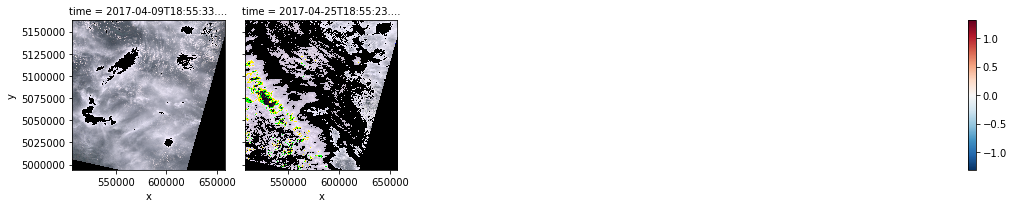

In [15]:
plot_rgb(ds,25000)

In [ ]:
ds.red.isel(time=1).plot(cmap='Reds')


### NDVI PLOT 

In [17]:
import matplotlib

In [18]:
ndvi = ((ds.nir-ds.red)/(ds.nir+ds.red))

In [19]:
ndvi_cmap = matplotlib.colors.ListedColormap(['blue', '#ffcc66','#ffffcc' , '#ccff66' , '#2eb82e', '#009933' , '#006600'])

In [20]:
ndvi_bounds = [-1, 0, 0.1, 0.25, 0.35, 0.5, 0.8, 1]

In [21]:
ndvi_norm = matplotlib.colors.BoundaryNorm(ndvi_bounds,ndvi_cmap.N)

In [ ]:
ndvi.isel(time=1).plot(cmap =ndvi_cmap, norm = ndvi_norm )